# Libraries 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.feature_selection import RFE
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA

# Data

Load Data

In [2]:
ASD_data = pd.read_csv("ASD_meta_abundance.csv")
OTU_data = pd.read_csv("GSE113690_Autism_16S_rRNA_OTU_assignment_and_abundance.csv")

Data Cleaning: Drop or impute missing values. Exclude non-numeric columns from median calculation

In [3]:
ASD_data_numeric = ASD_data.select_dtypes(include=[np.number])
ASD_data[ASD_data_numeric.columns] = ASD_data_numeric.fillna(ASD_data_numeric.median())

OTU_data_numeric = OTU_data.select_dtypes(include=[np.number])
OTU_data[OTU_data_numeric.columns] = OTU_data_numeric.fillna(OTU_data_numeric.median())

Exploratory Data Analysis (EDA)

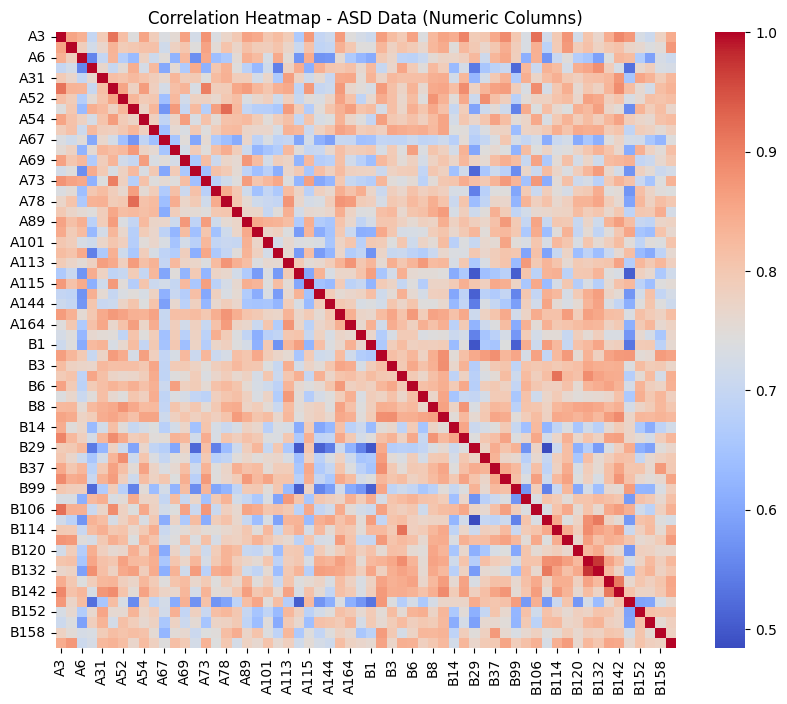

In [4]:
plt.figure(figsize=(10, 8))
sns.heatmap(ASD_data_numeric.corr(), annot=False, cmap='coolwarm')
plt.title("Correlation Heatmap - ASD Data (Numeric Columns)")
plt.show()

PCA to reduce dimensionality and visualize variance

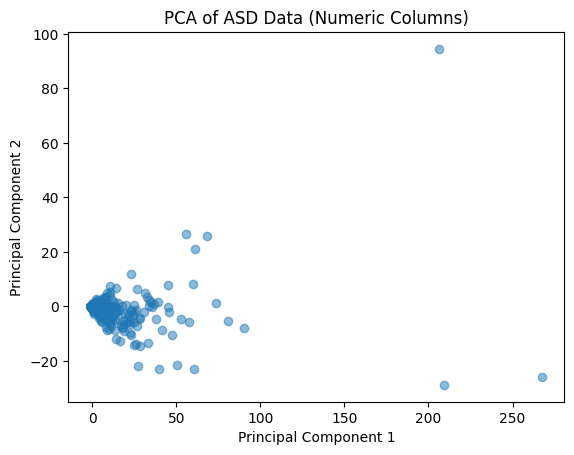

In [5]:
pca = PCA(n_components=2)
ASD_pca = pca.fit_transform(StandardScaler().fit_transform(ASD_data_numeric))
plt.scatter(ASD_pca[:, 0], ASD_pca[:, 1], alpha=0.5)
plt.title("PCA of ASD Data (Numeric Columns)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()

# Modelling

Preparing data for modeling

In [6]:
X = ASD_data_numeric.iloc[:, :-1]
y = ASD_data.iloc[:, -1]

Handle class imbalance by removing classes with very few samples

In [7]:
y_counts = y.value_counts()
valid_classes = y_counts[y_counts > 1].index
y = y[y.isin(valid_classes)]
X = X.loc[y.index]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

Standardizing features

In [8]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Models and hyperparameter tuning

In [9]:
models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC(),
    'KNN': KNeighborsClassifier()
}

param_grid = {
    'Logistic Regression': {'C': [0.1, 1, 10]},
    'Random Forest': {'n_estimators': [50, 100, 200], 'max_depth': [None, 10, 20]},
    'SVM': {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']},
    'KNN': {'n_neighbors': [3, 5, 7]}
}

for name, model in models.items():
    grid_search = GridSearchCV(model, param_grid[name], cv=5, scoring='accuracy')
    grid_search.fit(X_train_scaled, y_train)
    best_model = grid_search.best_estimator_

    # Predict on the test set
    y_pred = best_model.predict(X_test_scaled)

    # Print results
    print(f"Model: {name}")
    print(f"Best Parameters: {grid_search.best_params_}")
    print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
    print(classification_report(y_test, y_pred))


c:\Users\pablo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_split.py:776: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(
c:\Users\pablo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\pablo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the numb

Model: Logistic Regression
Best Parameters: {'C': 1}
Accuracy: 0.7445652173913043
              precision    recall  f1-score   support

           0       0.84      0.99      0.91       817
           1       0.20      0.09      0.12       113
           2       0.15      0.07      0.10        41
           3       0.11      0.07      0.09        28
           4       0.00      0.00      0.00        16
           5       0.00      0.00      0.00        12
           6       0.00      0.00      0.00         9
           7       0.00      0.00      0.00         6
           8       0.00      0.00      0.00         7
           9       0.00      0.00      0.00         6
          10       0.00      0.00      0.00         5
          11       0.00      0.00      0.00         4
          12       0.00      0.00      0.00         4
          13       0.00      0.00      0.00         3
          14       0.00      0.00      0.00         2
          15       0.00      0.00      0.00         2

c:\Users\pablo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\pablo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\pablo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, 

Model: Random Forest
Best Parameters: {'max_depth': None, 'n_estimators': 200}
Accuracy: 0.7681159420289855
              precision    recall  f1-score   support

           0       0.89      0.98      0.93       817
           1       0.38      0.28      0.32       113
           2       0.14      0.05      0.07        41
           3       0.11      0.11      0.11        28
           4       0.27      0.19      0.22        16
           5       0.22      0.17      0.19        12
           6       0.21      0.33      0.26         9
           7       0.25      0.17      0.20         6
           8       0.00      0.00      0.00         7
           9       0.20      0.17      0.18         6
          10       0.00      0.00      0.00         5
          11       0.00      0.00      0.00         4
          12       0.00      0.00      0.00         4
          13       0.00      0.00      0.00         3
          14       0.00      0.00      0.00         2
          15       0.00    

c:\Users\pablo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\pablo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\pablo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, 

Model: SVM
Best Parameters: {'C': 10, 'kernel': 'linear'}
Accuracy: 0.7472826086956522
              precision    recall  f1-score   support

           0       0.84      0.99      0.91       817
           1       0.29      0.07      0.11       113
           2       0.25      0.10      0.14        41
           3       0.08      0.04      0.05        28
           4       0.33      0.12      0.18        16
           5       0.00      0.00      0.00        12
           6       0.00      0.00      0.00         9
           7       0.00      0.00      0.00         6
           8       0.00      0.00      0.00         7
           9       0.00      0.00      0.00         6
          10       0.00      0.00      0.00         5
          11       0.00      0.00      0.00         4
          12       0.00      0.00      0.00         4
          13       0.00      0.00      0.00         3
          14       0.00      0.00      0.00         2
          15       0.00      0.00      0.00     

c:\Users\pablo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\pablo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\pablo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, 

Model: KNN
Best Parameters: {'n_neighbors': 7}
Accuracy: 0.7509057971014492
              precision    recall  f1-score   support

           0       0.87      0.96      0.92       817
           1       0.33      0.27      0.29       113
           2       0.18      0.10      0.13        41
           3       0.17      0.11      0.13        28
           4       0.14      0.06      0.09        16
           5       0.00      0.00      0.00        12
           6       0.17      0.11      0.13         9
           7       0.12      0.17      0.14         6
           8       0.00      0.00      0.00         7
           9       0.00      0.00      0.00         6
          10       0.00      0.00      0.00         5
          11       0.00      0.00      0.00         4
          12       0.00      0.00      0.00         4
          13       0.00      0.00      0.00         3
          14       0.00      0.00      0.00         2
          15       0.00      0.00      0.00         2
     

c:\Users\pablo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\pablo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\pablo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, 

Feature Selection using RFE with Logistic Regression

In [10]:
rfe = RFE(LogisticRegression(), n_features_to_select=5)
rfe.fit(X_train_scaled, y_train)
print("Selected Features by RFE:", X.columns[rfe.support_])

c:\Users\pablo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\pablo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/st

Selected Features by RFE: Index(['A53', 'B8', 'B28', 'B106', 'B132'], dtype='object')
